In [20]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

from sklearn.linear_model import LogisticRegression
# model = LogisticRegression().fit(X0, y)
import statsmodels.api as sm
#model = sm.Logit(y, X)
#result = model.fit(disp=0)
#sigmoid = result.predict(sm.add_constant(xx))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
#model1 = QuadraticDiscriminantAnalysis().fit(X, y)
#model2 = LinearDiscriminantAnalysis().fit(X, y)
#yhat1 = model1.predict(X)
#yhat2 = model2.predict(X)

from sklearn.naive_bayes import GaussianNB
#clf_norm = GaussianNB().fit(X, y)

## Anaconda: localhost:8890
## python3: localhost:8888

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
pd.DataFrame(iris.data)##feature이름 확인필요 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X, y)

In [23]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[:2])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' ##  Graphviz 패스 정해줘야함 

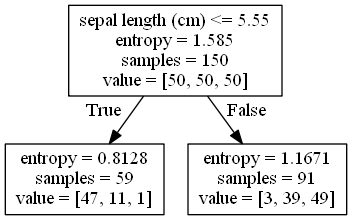

In [25]:
draw_decision_tree(tree1)

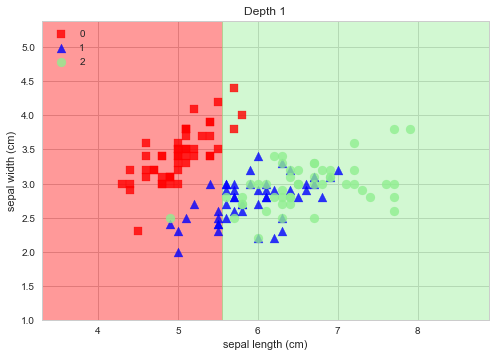

In [26]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()


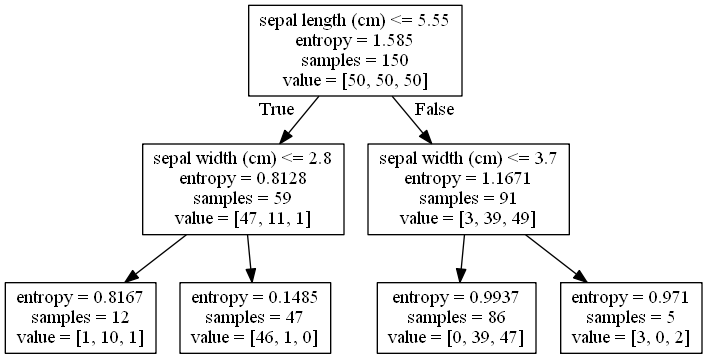

In [27]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X, y)
draw_decision_tree(tree2)

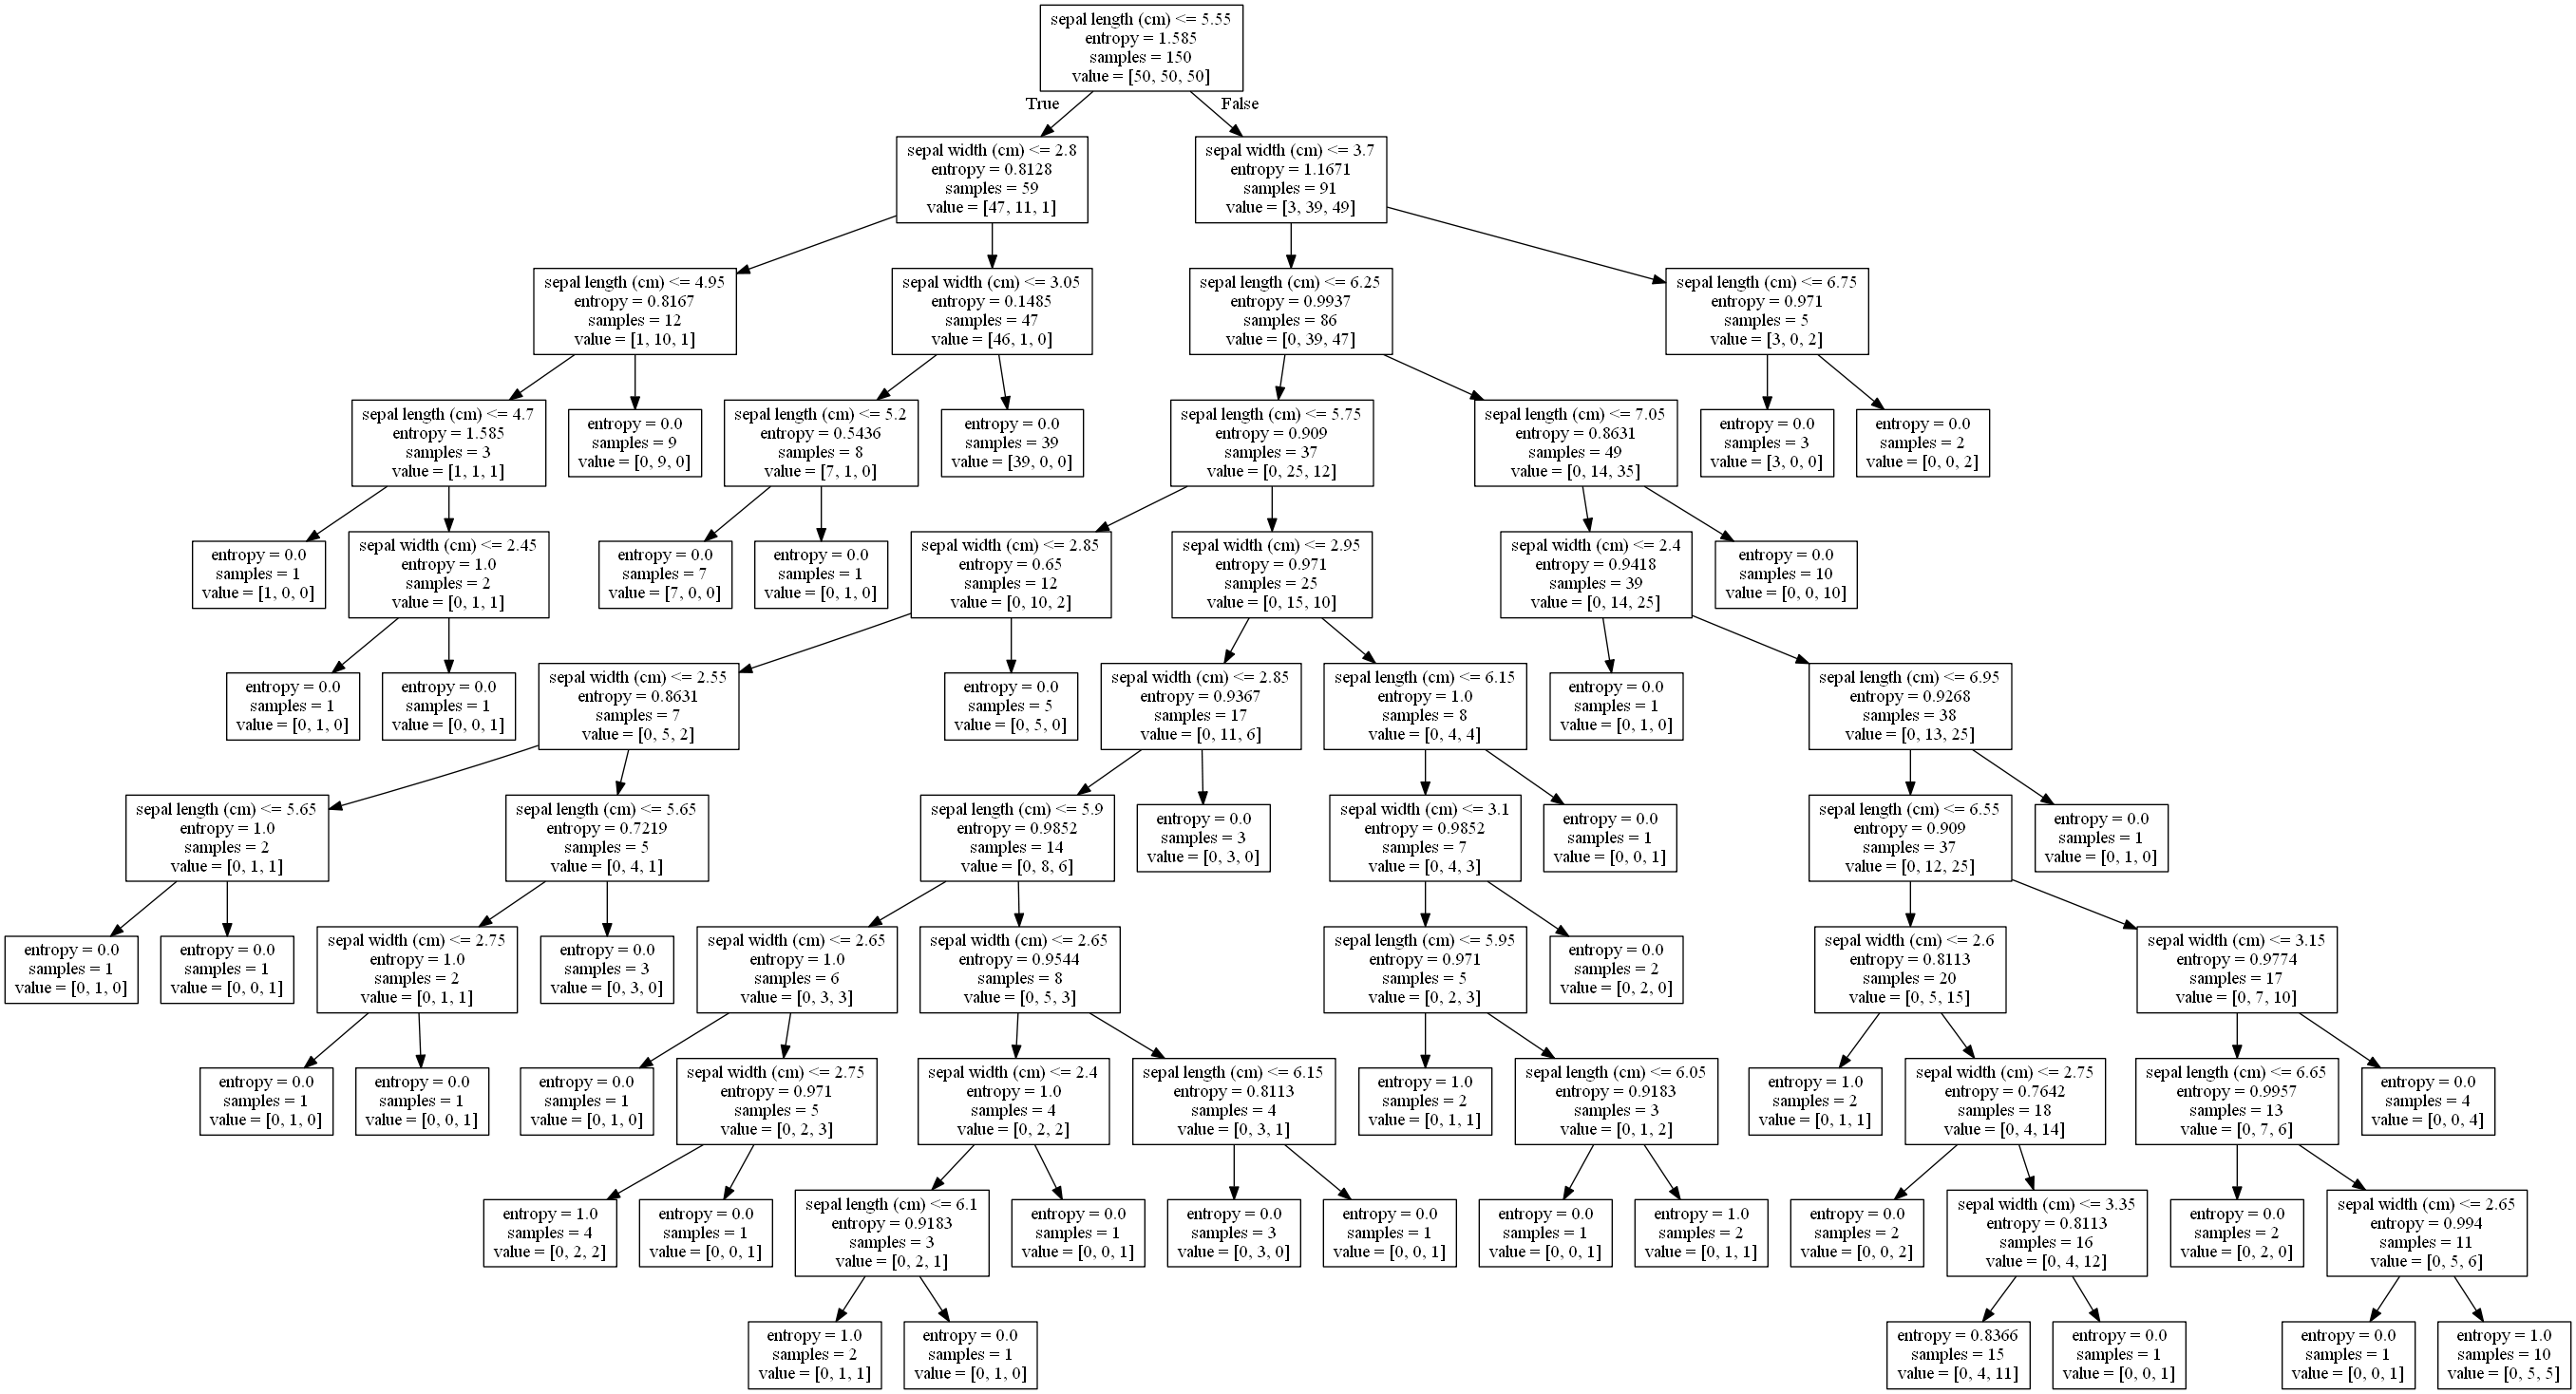

In [28]:
tree10 = DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X, y)
draw_decision_tree(tree10)

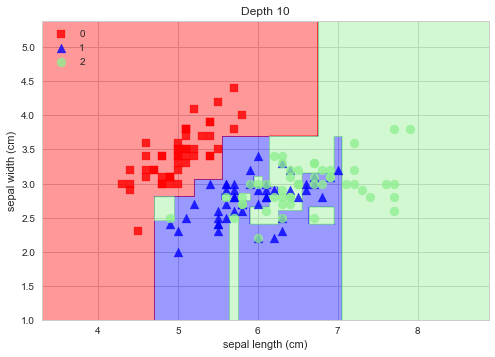

In [29]:
plot_decision_regions(X, y, tree10, "Depth 10")
plt.show()
## 너무 많이 노드를 만들면 결국 오버피팅됨 
### 오버피팅이 된경우에는 cross_validation을 하여 오버피팅 확인 

In [36]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0) ## 셔플로 섞어줘야함 아니면 1번부터 순서대로 샘플 뽑아줌 
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )

test index : [  7   8  16  22  24  26  33  37  40  44  45  51  54  62  63  66  71  73
  76  78  86  90  93  97 100 107 114 121 126 134]
................................................................................
train index: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  17  18  19  20
  21  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43  46
  47  48  49  50  52  53  55  56  57  58  59  60  61  64  65  67  68  69
  70  72  74  75  77  79  80  81  82  83  84  85  87  88  89  91  92  94
  95  96  98  99 101 102 103 104 105 106 108 109 110 111 112 113 115 116
 117 118 119 120 122 123 124 125 127 128 129 130 131 132 133 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
test index : [  2  10  18  27  43  50  56  59  60  61  69  80  83  84  92 106 108 112
 116 119 123 127 132 133 135 137 141 144 146 147]
................................................................................
train index: [  0   1   3   4   5   6   7   8   9  11  12  13  14

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree10, X, y, scoring="accuracy", cv=cv) ## 셋1,2,3,4,5 에 대한 성능값 

array([ 0.53333333,  0.53333333,  0.7       ,  0.76666667,  0.63333333])

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
x = pd.DataFrame(cancer.data)##feature이름 확인필요 
X = X[:,:2]

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X, y)

In [15]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=cancer.feature_names[:2])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

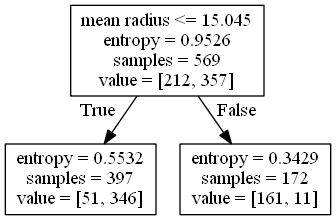

In [16]:
draw_decision_tree(tree1)

In [17]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X, y)

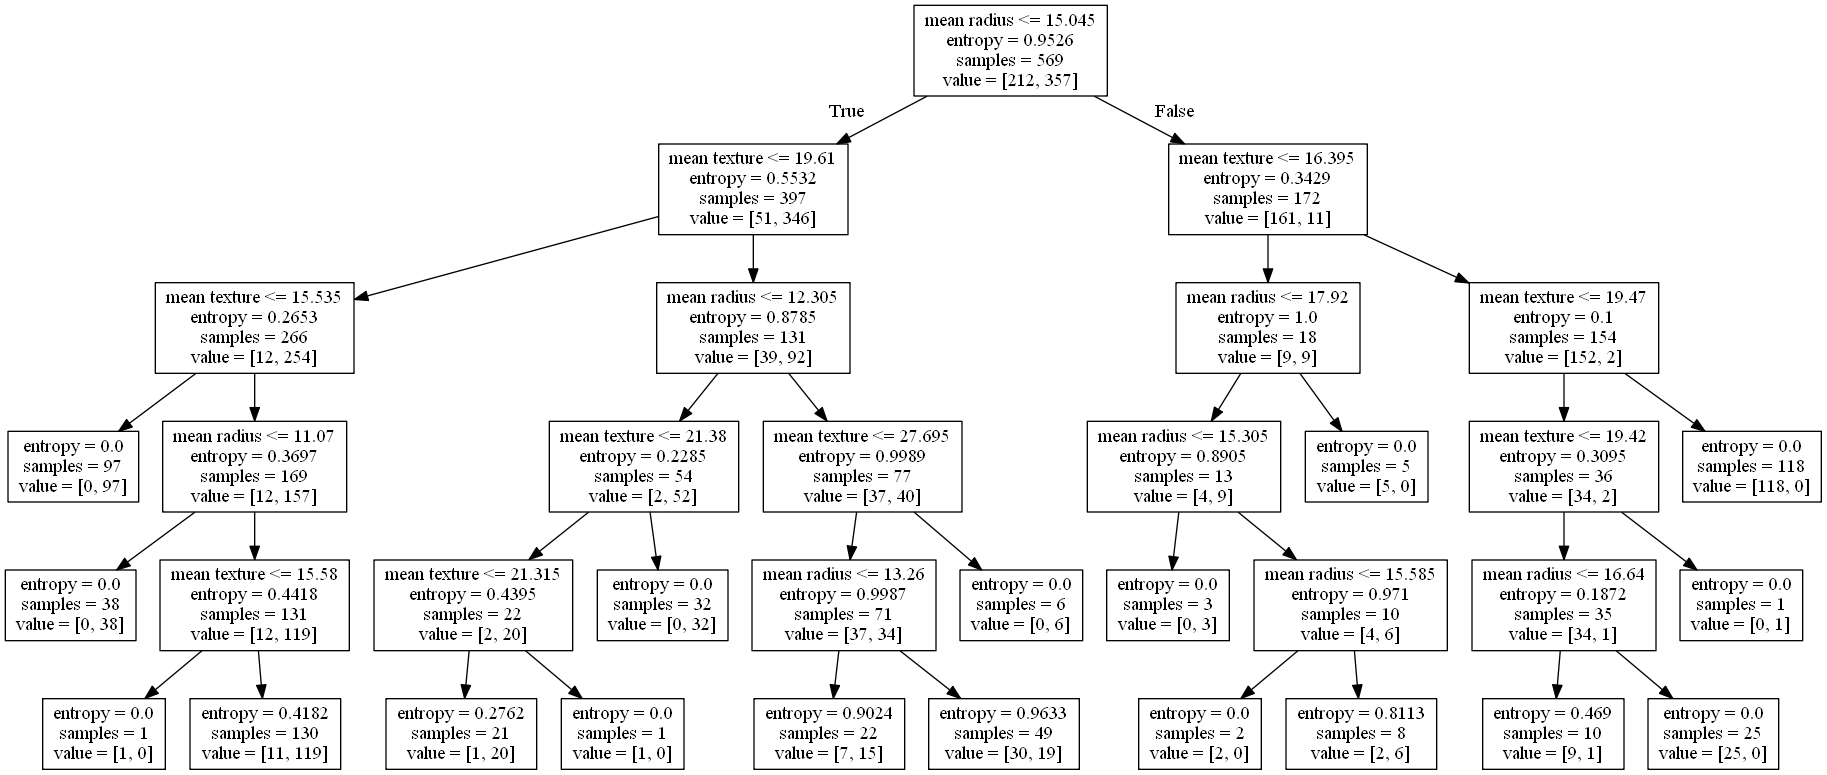

In [18]:
draw_decision_tree(tree5)

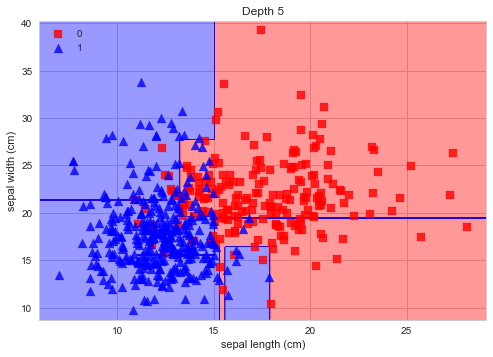

In [19]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()